## Quantative Predictors And Interaction Terms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "./data/"
credit = pd.read_csv(data_path+"Credit.csv", index_col=0)

#### 범주가 2개인 범주형 변수

In [3]:
model = smf.ols('Balance ~ Student', data = credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.49e-07
Time:                        22:08:34   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# design matrix 생성
import patsy
y, X = patsy.dmatrices('Balance ~ Student', data = credit, return_type='dataframe')
X.head()

,Intercept,Student[T.Yes]
1,1.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0


#### 범주가 3개 이상인 범주형 변수

In [6]:
model2 = smf.ols('Balance ~ Ethnicity ', data = credit).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


#### 기준 레벨(referecne level) 변경

In [7]:
model3 = smf.ols('Balance ~ C(Ethnicity, Treatment(reference = "Asian")) ', data = credit).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,512.3137,45.632,11.227,0.000,422.602,602.025
"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]",18.6863,65.021,0.287,0.774,-109.142,146.515
"C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]",6.1838,56.122,0.110,0.912,-104.149,116.517


In [8]:
# Design Matrix 생성
y, X1 = patsy.dmatrices('Balance ~ Ethnicity', data = credit, return_type = "dataframe")
y, X2 = patsy.dmatrices('Balance ~ C(Ethnicity, Treatment(reference = "Asian")) ', data = credit, return_type="dataframe")

In [9]:
X1.head()

,Intercept,Ethnicity[T.Asian],Ethnicity[T.Caucasian]
1,1.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
5,1.0,0.0,1.0


In [10]:
X2.head()

,Intercept,"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]","C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]"
1,1.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,1.0


#### 범주형 설명변수와 연속형 설명변수

In [11]:
model4 = smf.ols('Balance ~ Income + Student ', data = credit).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,211.1430,32.457,6.505,0.000,147.333,274.952
Student[T.Yes],382.6705,65.311,5.859,0.000,254.272,511.069
Income,5.9843,0.557,10.751,0.000,4.890,7.079


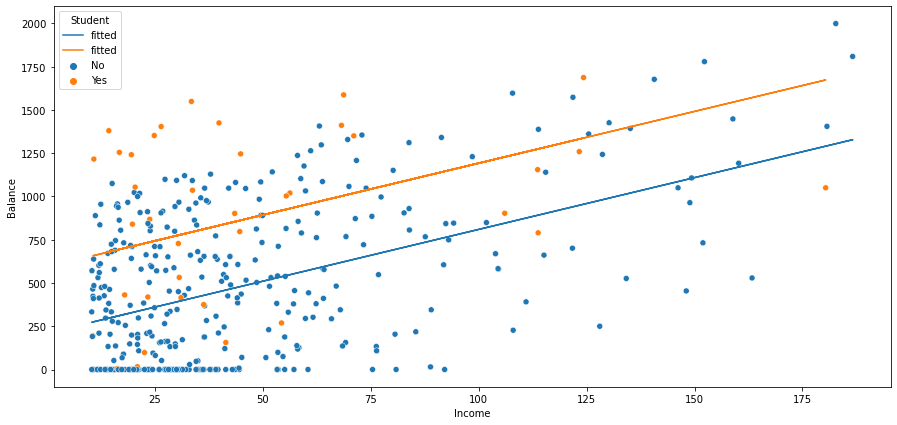

In [12]:
credit['fitted'] = model4.fittedvalues

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))

credit.groupby('Student').plot(x='Income', y='fitted', 
                               ax=ax, legend=False)
sns.scatterplot(x= "Income", y="Balance", data=credit, hue="Student")
plt.show()

In [13]:
# 부분 F 검정
from statsmodels.stats.anova import anova_lm
model5 = smf.ols('Balance ~ Income + Student + Ethnicity ', data = credit).fit()
model5.summary().tables[1]

anova_lm(model4, model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,6.093905e+07,0.0,NaN,NaN,NaN
1,395.0,6.090901e+07,2.0,30047.507138,0.09743,0.907187


#### Effect coding

In [14]:
model5 = smf.ols('Balance ~ Income + C(Student, Sum)', data = credit).fit()
model5.summary().tables[1]

y, X = patsy.dmatrices('Balance ~ Income + C(Student, Sum)', data=credit, return_type = "dataframe")
X.head()

,Intercept,"C(Student, Sum)[S.No]",Income
1,1.0,1.0,14.891
2,1.0,-1.0,106.025
3,1.0,1.0,104.593
4,1.0,1.0,148.924
5,1.0,1.0,55.882


#### 교호작용 효과

In [15]:
ad=pd.read_csv(data_path + "Advertising.csv")
model_ad = smf.ols('Sales~TV+Radio+TV*Radio', data = ad).fit()
model_ad.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


#### 범주형 변수와 연속형 변수 사이의 교호작용

In [16]:
model6 = smf.ols('Balance~(Income+Student)**2', data = credit).fit()
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,33.698,5.953,0.000,134.373,266.873
Student[T.Yes],476.6758,104.351,4.568,0.000,271.524,681.827
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Income:Student[T.Yes],-1.9992,1.731,-1.155,0.249,-5.403,1.404


#### 범주형 변수 처리 실습

1. Allen Cognitive Level (ACL) Study를 진행하는 연구자들은 ACL test 점수와 정신병리학적 수준과의 관계를 알아보기 위해 아래의 변수들을 측정하였다.

Response y = ACL test score  
Predictor x1 = vocabulary (Vocab) score on the Shipley Institute of Living Scale  
Predictor x2 = abstraction (Abstract) score on the Shipley Institute of Living Scale  
Predictor x3 = score on the Symbol-Digit Modalities Test (SDMT)

1-a. 23명의 환자들에 대한 데이터인 `allentestn23.txt`를 사용하여 Scatterplot matrix를 그리고 회귀모형을 적합하기에 적당한지 확인하시오. 어떤 문제가 발생할 것으로 예상되는가?

In [18]:
test23 = pd.read_table(data_path+'allentestn23.txt', sep="\t", index_col=0)
test23.head()

,ACL,SDMT,Vocab,Abstract
Subj,,,,
6,4.5,23,24,24
8,5.9,50,18,14
10,4.8,27,14,8
15,4.5,26,15,10
17,5.9,42,30,32


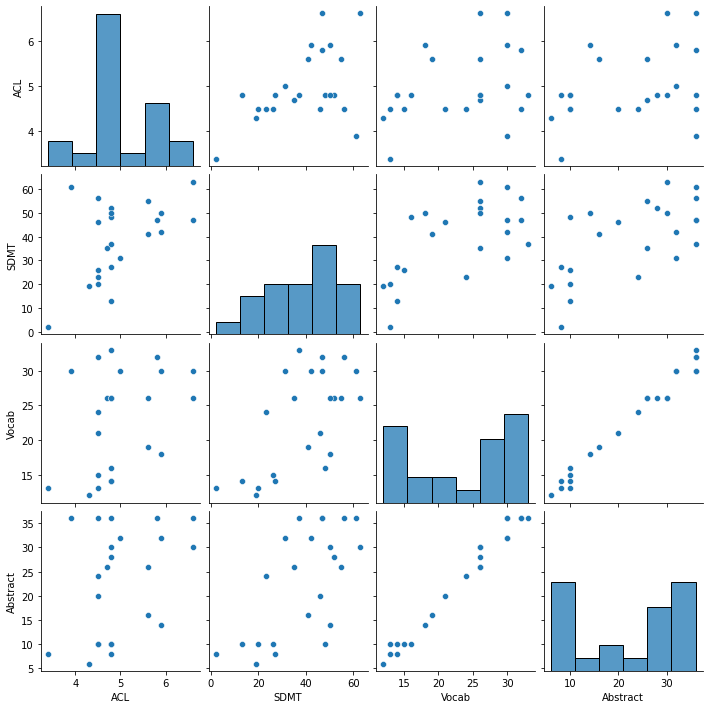

In [19]:
sns.pairplot(test23)
plt.show()

1-b. `allentestn23.txt`데이터로 회귀모형을 적합하고 다중공선성의 문제가 발생하는지 파악하시오. 어느 변수들 간의 문제가 발생하는가?

In [20]:
model = smf.ols('ACL~SDMT+Vocab+Abstract',data=test23).fit()

import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test23, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 76.84316917575055
VIF of SDMT : 1.7261852740005994
VIF of Vocab : 49.286238682129245
VIF of Abstract : 50.60308486118107


1-3. 본 연구에서는 위에서 문제가 된 두 변수를 모형에 포함시켜야 하는 과학적 이유가 존재하여 데이터를 더 모으기로 결정하였다. `allentest.txt` 데이터를 사용하여 위의 과정을 반복하고 다중공선성 문제가 해소되었는지 확인하시오.

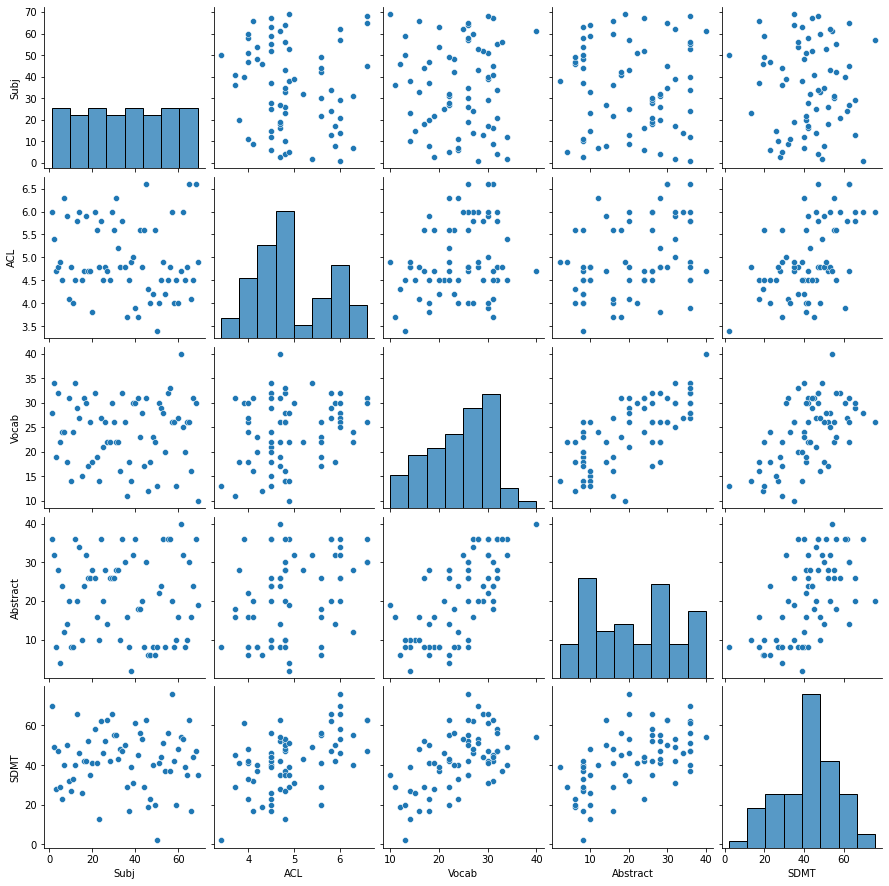

In [21]:
test = pd.read_table(data_path + 'allentest.txt', sep="\t")
sns.pairplot(test)
plt.show()

In [22]:
model = smf.ols('ACL~SDMT+Vocab+Abstract',data=test).fit()

import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 16.670443334584185
VIF of SDMT : 1.6096624348013036
VIF of Vocab : 2.0932972330713193
VIF of Abstract : 2.1674284112401403


## Variable Selection And Shrinkage Method